<a href="https://colab.research.google.com/github/Heisnotanimposter/test_repo/blob/main/Diffusion_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
To build a Stable Diffusion-LSTM climate change prediction deep learning model, you'll need to follow these steps:

Collect and preprocess data: Gather historical climate change data such as temperature, precipitation, atmospheric pressure, 
and other relevant factors. Preprocess the data by cleaning, normalizing, and transforming it into a suitable format for LSTM (Long Short-Term Memory) models.

Define the model architecture: Design a deep learning model architecture that combines Stable Diffusion and LSTM layers. 
Stable Diffusion can be used to model the spatial interactions in the data, while LSTM can capture the temporal dependencies.

Split the data: Divide your dataset into training, validation, and testing sets. 
This allows you to train the model on one subset of data and evaluate its performance on unseen data.

Train the model: Train the model using the training dataset. 
Adjust hyperparameters such as learning rate, batch size, and the number of epochs to improve the model's performance.

Evaluate the model: Use the validation set to evaluate the model's performance during training. 
This helps you identify any overfitting or underfitting issues and adjust the model accordingly.

Fine-tune the model: Based on the model's performance on the validation set, fine-tune the model architecture, and hyperparameters if necessary.

Test the model: 
Once you're satisfied with the model's performance on the validation set, evaluate it on the testing set to get an unbiased estimate of its performance on unseen data.

Interpret the results: Analyze the model's predictions to understand the underlying patterns and trends in the climate change data.

Deploy the model: Once the model is trained and tested, deploy it to make predictions on new climate change data.

Remember that building a deep learning model for climate change prediction can be an iterative process. 
You might need to experiment with different model architectures, hyperparameters, and data preprocessing techniques to achieve the best results.
"""

In [ ]:
from scipy.stats import norm
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,LearningRateScheduler

x = np.linspace(-3, 3, num = 100) #Input x
sigma = 1 # Standard Deviation
mean = 0 # Mean

print(x)

constant = np.sqrt(2.0*np.pi*sigma**2)
pdf_normal_distribution = np.exp(-((x - mean)**2/(2.0*sigma**2)))/constant

fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Beta:  [9.99999975e-05 6.04040397e-04 1.10808085e-03 1.61212124e-03
 2.11616163e-03 2.62020202e-03 3.12424242e-03 3.62828281e-03
 4.13232343e-03 4.63636359e-03 5.14040422e-03 5.64444438e-03
 6.14848500e-03 6.65252516e-03 7.15656579e-03 7.66060594e-03
 8.16464610e-03 8.66868719e-03 9.17272735e-03 9.67676751e-03
 1.01808077e-02 1.06848488e-02 1.11888889e-02 1.16929291e-02
 1.21969692e-02 1.27010103e-02 1.32050505e-02 1.37090907e-02
 1.42131317e-02 1.47171719e-02 1.52212121e-02 1.57252531e-02
 1.62292924e-02 1.67333335e-02 1.72373746e-02 1.77414138e-02
 1.82454549e-02 1.87494941e-02 1.92535352e-02 1.97575763e-02
 2.02616155e-02 2.07656566e-02 2.12696977e-02 2.17737369e-02
 2.22777780e-02 2.27818191e-02 2.32858583e-02 2.37898994e-02
 2.42939387e-02 2.47979797e-02 2.53020208e-02 2.58060601e-02
 2.63101012e-02 2.68141422e-02 2.73181815e-02 2.78222226e-02
 2.83262618e-02 2.88303029e-02 2.93343440e-02 2.98383832e-02
 3.03424243e-02 3.08464654e-02 3.13505046e-02 3.18545438e-02
 3.23585868e-02 3

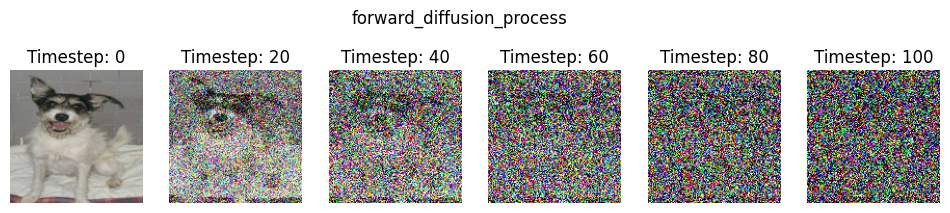

In [ ]:
import os
import scipy
import urllib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def forward_diffusion_process(img_prev, beta, t):
    beta_t = beta[t].reshape(-1, 1, 1)
    
    #Calculate mean and variance
    mu = np.sqrt((1.0 - beta_t)) * img_prev
    sigma = np.sqrt(beta_t)
    
    #Obtain image at timestep t using equation
    img_t = mu + sigma * np.random.randn(*img_prev.shape)
    return img_t


#Input
img = Image.open("/content/drive/MyDrive/cat and dog dataset/test_set/test_set/dogs/dog.4028.jpg")
IMG_SIZE = (128, 128)
img = img.resize(size=IMG_SIZE)
img_curr = np.asarray(img.copy(), dtype=np.float32) / 255.

#Parameters
timesteps = 100
beta_start = 0.0001
beta_end = 0.05
beta = np.linspace(beta_start, beta_end, num=timesteps, dtype=np.float32)

print("Beta: ", beta)

processed_images = []

# Run the forward process to obtain img after t timesteps
for t in range(timesteps):
    img_curr = forward_diffusion_process(img_prev=img_curr, beta=beta, t=t)
    if t%20==0 or t==timesteps - 1:
        sample = (img_curr.clip(0, 1) * 255.0).astype(np.uint8)
        processed_images.append(sample)

#Plot and see samples at different timesteps
_, ax = plt.subplots(1, len(processed_images), figsize=(12, 5))

for i, sample in enumerate(processed_images):
    ax[i].imshow(sample)
    ax[i].set_title(f"Timestep: {i*20}")
    ax[i].axis("off")
    ax[i].grid(False)

plt.suptitle("forward_diffusion_process", y=0.75)
plt.show()


In [ ]:
!pip install tab2img

from tab2img.converter import Tab2Img


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train = pd.read_feather("../input/amex-processed/train_processed(1).ftr")